<p><img alt="Colaboratory logo" height="45px" src=https://www.yuntech.edu.tw/images/mainmenu/about/yuntech_logo.jpg width="28" align="left" hspace="10px" vspace="27px" style="margin: 27px 10px"></p>
<h1><font color="red">    金融數據</font>與<font color="green">程式設計</font></h1>

<h4 style="font-weight: bold"><font color="blue">作者：劉文讓</font></h4>
<a id='Front'></a>
Python是一種物件導向的電腦程式語言，在2017年 IEEE 程式語言調查、Kaggle 使用者調查都榮登第一名，為資料科學家最喜愛的程式語言。

Pandas是Python的一個專門用來做數據分析的套件，也是目前全世界數據分析師最喜歡使用的套件之一。

`參考網址`：
[104Pandas相關職缺](https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=pandas&jobcatExpansionType=1&order=15&asc=0&page=3&mode=s)
[美國Python資料分析師平均年薪](https://www.ziprecruiter.com/Salaries/Python-Data-Scientist-Salary)


------
<a id='HOME'></a>
### 課程目錄：

* [0 認識Jupyter Notebook編輯器](#c0)
* [1 Pandas的資料類型](#c1)
* [2 索引值的運用與資料篩選](#c2)
* [3 下載真正的股票資料](#c3)
* [4 基本資料分析](#c4)
* [5 資料視覺化](#c5)
* [補充：操作Excel的讀取與寫入方法](#appendix)

------
<a id='c0'></a>
## 0 認識Jupyter Notebook編輯器
[回目錄](#HOME)

- **執行程式：**
按工具列鈕`►|Run`或按 Shift-Enter 鍵執行完程式後會將游標移到下一個 Cell ，如果下一個 Cell 不存在，即會新增一個 Cell 再移到其中。按 Ctrl-Enter 鍵執行完程式後則游標會停留在原有 Cell。

![執行](https://problemsolvingwithpython.com/02-Jupyter-Notebooks/images/run_cell.png)

 - **匯入套件：**首先我們要先匯入今天會用到的套件，例如：`Pandas`、`Numpy`、`datetime`、`Pandas_datareader`、`Matplotlib`、`Pyecharts`。

In [1]:
import pandas as pd
import numpy as np
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pyecharts import options as opts   
from pyecharts.charts import Kline

C:\Users\AsusNotebook\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


------
<a id='c1'></a>
## 1 Pandas的資料類型
[回目錄](#HOME)

DataFrame(資料框架)與Series(序列)

### Series
一維陣列資料

In [2]:
s = pd.Series([1,3,-5,6,8])
print (s)

0    1
1    3
2   -5
3    6
4    8
dtype: int64


### DataFrame
與Excel表格一樣，是二維的資料，
以方法index表示列名稱，方法column表示列名稱

- 接著我們用矩陣資料建立DataFrame變數

In [3]:
# 亂數產生學期成績資料 (需匯入Numpy套件)：
# 產生6*4的陣列，最高為100，最低為20
np.random.seed(0)
scores=np.random.randint(low=20,high=100,size=(6,4))
scores

array([[64, 67, 84, 87],
       [87, 29, 41, 56],
       [90, 32, 78, 85],
       [59, 66, 57, 45],
       [97, 92, 29, 40],
       [89, 99, 67, 84]])

In [4]:
# 建立dataframe資料
df = pd.DataFrame(scores, index=['張無忌','趙敏','程靈素','郭靖','令狐沖','黃蓉'], \
                  columns=['財務管理','投資學','會計學','經濟學'])
df

,財務管理,投資學,會計學,經濟學
張無忌,64,67,84,87
趙敏,87,29,41,56
程靈素,90,32,78,85
郭靖,59,66,57,45
令狐沖,97,92,29,40
黃蓉,89,99,67,84


------
<a id='c2'></a>
## **2 索引值的運用與資料篩選**
[回目錄](#HOME)

- 取出其中一欄資料：

例如：查詢全班學生的投資學成績

In [5]:
df['投資學']

張無忌    67
趙敏     29
程靈素    32
郭靖     66
令狐沖    92
黃蓉     99
Name: 投資學, dtype: int32

### `loc` 與 `iloc`定位方法：最推薦的取值方法

``````Python
df.loc[列的範圍(自訂索引), [行的範圍(自訂索引)]]
df.iloc[列的範圍(內建索引), [行的範圍(內建索引)]]

注意：索引值由0開始，0表示該列或該行的第1個元素
``````

`例如`：查詢某一科多位學生的成績。

In [6]:
df.loc["郭靖":"黃蓉",["會計學"]]

,會計學
郭靖,57
令狐沖,29
黃蓉,67


In [7]:
df.iloc[3:6,2]

郭靖     57
令狐沖    29
黃蓉     67
Name: 會計學, dtype: int32

`例如`：查詢會計學與經濟學多位學生的成績。

In [8]:
df.loc['趙敏',["會計學","經濟學"]]

會計學    41
經濟學    56
Name: 趙敏, dtype: int32

In [9]:
df.iloc[1,[2,3]]

會計學    41
經濟學    56
Name: 趙敏, dtype: int32

`例如`：查詢座號不連續(趙敏與令狐沖)的同學他們的會計學與經濟學成績。

**<font color="red">底下程式是無法執行的：</font>**
``````Python
df.loc[['趙敏','令狐沖'],["會計學","經濟學"]]
``````

**<font color="blue">底下程式是可以執行的：</font>**
``````Python
df.loc[['趙敏','令狐沖'],:]
``````

`例如`：查詢財務管理及格的同學，並列出他們的會計學與經濟學成績。

In [10]:
df.loc[df.財務管理>=60,["會計學","經濟學"]]

,會計學,經濟學
張無忌,84,87
趙敏,41,56
程靈素,78,85
令狐沖,29,40
黃蓉,67,84


------
<a id='c3'></a>
## **3 下載真正的股票資料**
[回目錄](#HOME)

資料來源：[Yahoo Finance](https://finance.yahoo.com/)

**1. 手動匯入(較累較不推薦)：**

    1. 輸入股票代碼 (例如：^TWII, 2330.tw, ^GSPC, AAPL, IBM)
    2. 選擇時間範圍
    3. 下載(`Download`)檔案(`.csv`)
    4. 資料存放在同一資料夾
    5. 匯入資料 (`pd.read_csv("檔案名稱")`)

**2. 使用pandas-datareader套件(方便且容易)：**

    1. 安裝pandas-datareader套件：!pip install pandas-datareader
    2. 輸入股票代碼 (例如：^TWII, ^GSPC, AAPL, IBM)
    3. 選擇時間範圍
    4. 匯入資料，總共會有底下欄位：Open, High, Low, Close, Adj Close,Volume
    5. 自動使用日期格式當作索引值

In [11]:
開始日=datetime.datetime(2020,1,1)
股票代碼='2330.tw'
結束日=datetime.datetime(2020,7,31)
s2330=web.DataReader(股票代碼,'yahoo',開始日,結束日)
s2330.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,339.0,332.5,332.5,339.0,31754120.0,333.075775
2020-01-03,345.0,335.5,344.0,339.5,41811268.0,333.567047
2020-01-06,334.5,332.0,333.0,332.0,45343057.0,326.198120
2020-01-07,333.0,326.5,332.5,329.5,50879181.0,323.741791
2020-01-08,333.0,325.0,325.0,329.5,37567748.0,323.741791


### **練習 1：資料擷取**
1. 請下載台泥(1101)股價資料，資料期間為2020年1月1日至2020年7月31日。
2. 請你列出2020年3月19日及2020年7月31日當天的收盤價(Close)與交易量(Volume)。
3. 請你列出台泥收盤價超過41元的資料。

------
<a id='c4'></a>
## **4 基本資料分析**
[回目錄](#HOME)


### 基本敘述統計量：使用DataFrame變數的方法

可針對行或列資料計算敘述統計量
- 平均數 `mean`
- 標準差 `std`
- 最大值 `max`
- 最小值 `min`
- 以上所有方法的結果，以及中位數(median)、第一四分位數、第三四分位數 `describe`

In [12]:
# 台積電股價的敘述統計量
s2330.describe()

,High,Low,Open,Close,Volume,Adj Close
count,139.000000,139.000000,139.000000,139.000000,1.390000e+02,139.000000
mean,319.517986,313.629496,316.892086,316.446043,5.256633e+07,313.510699
std,35.205320,34.019034,35.013857,34.280371,2.849289e+07,34.709247
min,253.000000,235.500000,252.000000,248.000000,1.593708e+07,246.031738
25%,297.000000,293.250000,294.500000,295.000000,3.427821e+07,292.658722
50%,317.000000,312.500000,315.000000,315.000000,4.599292e+07,312.000000
75%,333.750000,330.000000,332.000000,331.750000,6.107652e+07,326.443741
max,466.500000,428.500000,464.000000,435.000000,1.663077e+08,435.000000


- mean(axis)：平均值
    - `axis=0`：為預設值，針對同一行(欄)內所有不同列的元素去做運算。
    - `axis=1`：針對同一列內所有不同行的元素去做運算。
- std、max、min、median的用法和mean相同

In [13]:
# 各科的平均值
df.mean() #或 df.mean(0)

財務管理    81.000000
投資學     64.166667
會計學     59.333333
經濟學     66.166667
dtype: float64

In [14]:
# 每個學生的平均成績
df.mean(1)

張無忌    75.50
趙敏     53.25
程靈素    71.25
郭靖     56.75
令狐沖    64.50
黃蓉     84.75
dtype: float64

### 相關係數 (`corr`)
- `data` 資料框架變數
- `data.corr()` 相關係數矩陣
- `data.欄位名稱1.corr(data.欄位名稱2)` 指定兩個變數的相關係數

In [15]:
df.corr()

,財務管理,投資學,會計學,經濟學
財務管理,1.000000,0.059386,-0.442171,-0.033260
投資學,0.059386,1.000000,-0.149850,-0.105958
會計學,-0.442171,-0.149850,1.000000,0.879566
經濟學,-0.033260,-0.105958,0.879566,1.000000


In [16]:
df['財務管理'].corr(df['投資學'])

0.05938609538380586

### 時間序列資料分析

- 移動視窗資料
- 移動平均值

In [17]:
# 5日移動視窗資料s
s = s2330.rolling(5)
s

Rolling [window=5,center=False,axis=0]

In [18]:
# 5日移動平均值
s.mean()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,336.9,330.3,333.4,333.9,41471074.8,328.064905
...,...,...,...,...,...,...
2020-07-27,395.1,385.6,389.2,391.8,67840922.4,391.800000
2020-07-28,411.0,397.0,407.5,402.2,88258646.0,402.200000
2020-07-29,420.1,405.1,416.9,409.8,96639345.2,409.800000


### **練習 2：股價資料的敘述統計量**
1. 下載台積電(2330.tw)從今年1月至7月的每日股價
3. 計算這家公司的平均數、標準差、最小值與最大值、第一四分位數、第三四分位數 (`describe()`)。
4. 計算這家公司的交易量與收盤價的相關係數 (`corr`)。


------
<a id='c5'></a>
## **5 資料視覺化**
[回目錄](#HOME)

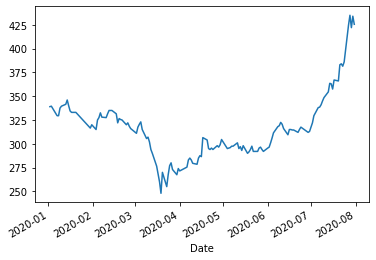

In [19]:
# 時間序列圖
# 2330 台積電收盤價變動趨劫
s2330['Close'].plot()

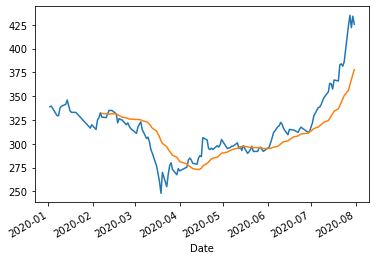

In [20]:
# 將收盤價20日移動平均線和收盤價畫在同一個圖
s2330['Close'].plot()
s2330['Close'].rolling(20).mean().plot()

### **K線圖**

In [21]:
KBar = [] 
Date = []

for i in range(0, s2330.shape[0]):
    day = s2330.index[i]
    price = [s2330["Open"][i], s2330["Close"][i], s2330["Low"][i], s2330["High"][i]]
    Date.append(day)
    KBar.append(price)
    
kline = Kline()  
kline.add_xaxis(xaxis_data = Date) 
kline.add_yaxis(series_name = "股價", 
                y_axis = KBar,  
                itemstyle_opts = opts.ItemStyleOpts(color = "#C23531",
                                                    color0 = "#00da3c", 
                                                    border_color = "#C23531", 
                                                    border_color0 = "#00da3c"),
                )

In [22]:
kline.set_global_opts(title_opts = opts.TitleOpts(title = "台積電(2330)"),
                      xaxis_opts = opts.AxisOpts(is_scale = True),
                      yaxis_opts = opts.AxisOpts(is_scale = True, 
                                                 splitarea_opts = opts.SplitAreaOpts(is_show = True, 
                                                                areastyle_opts = opts.AreaStyleOpts(opacity=1))), 
                      datazoom_opts = [opts.DataZoomOpts(type_ = "inside"),   
                                       opts.DataZoomOpts(is_show=True,  
                                                         type_="slider",),
                                       ],
                      tooltip_opts = opts.TooltipOpts(trigger="axis", 
                                                      axis_pointer_type="cross", 
                                                      background_color="rgba(245, 245, 245, 0.8)",
                                                      border_width=1,
                                                      border_color="#ccc",
                                                      textstyle_opts=opts.TextStyleOpts(color="#000"), 
                                                      ),
                      )
kline.render_notebook()

------
<a id='appendix'></a>
## **補充：操作Excel的寫入與寫出方法**
[回目錄](#HOME)

### **將我們下載好的股價資料儲存到Excel內**
- 輸入的方法：to_excel
- 輸入to_excel方法的參數：
    1. Excel的存儲路徑：只需要輸入檔案名稱即可
    2. sheet_name：Excel的工作表名稱

In [23]:
s2330.to_excel('2330.xlsx', sheet_name='股價資料')

### **讀取Excel的資料**
- 輸入的參數：
    1. Excel的存儲路徑：只需要輸入檔案名稱即可
    2. sheet_name：Excel的工作表名稱
    3. header：用哪一列作列名：一般很少設置
    4. index_col：用作索引的欄 (如index_col = 0)

In [24]:
x = pd.read_excel('2330.xlsx', header = 0, index_col=0)
x

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,339.0,332.5,332.5,339.0,31754120,333.075775
2020-01-03,345.0,335.5,344.0,339.5,41811268,333.567047
2020-01-06,334.5,332.0,333.0,332.0,45343057,326.198120
2020-01-07,333.0,326.5,332.5,329.5,50879181,323.741791
2020-01-08,333.0,325.0,325.0,329.5,37567748,323.741791
...,...,...,...,...,...,...
2020-07-27,424.5,416.5,420.5,424.5,99333798,424.500000
2020-07-28,466.5,428.5,464.0,435.0,166307746,435.000000
2020-07-29,431.5,419.5,428.0,422.0,85663166,422.000000
